In [ ]:
#THE PURPOSE OF THIS NOTEBOOK IS TO PERFORM MODEL COMPARISON

In [1]:
from tensorflow.keras.models import load_model

2023-12-02 20:36:42.427885: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
##Loading the first Model

In [4]:
import os
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.model_selection import train_test_split

#EDA

#load the spectograms dataset
path1 = '../Data/images_original/'
subfolders = os.listdir(path1)
subfolders.remove('.DS_Store')
print(subfolders)
data = []

music_genre = {
    'pop' : 1,
    'metal' : 2,
    'disco' : 3,
    'blues' : 4,
    'reggae' : 5,
    'classical' : 6,
    'rock' : 7,
    'hiphop' : 8,
    'country' : 9,
    'jazz' : 10
}

#obtain the genre value from the folder name
def get_genre(folder_name):
    return music_genre[folder_name]

def get_genre_from_value(genre_value):
    for genre, value in music_genre.items():
        if value == genre_value:
            return genre
    return None  # Return None if the value is not found

for folder in subfolders:
    path2 = os.path.join(path1,folder)
    print(path2)
    files = os.listdir(path2)
    #print(files)
    for file in files:
            img_path = os.path.join(path2,file)
            #print(img_path)
            #print('Image path: ',img_path)
            #Open the image file
            img = Image.open(img_path)
            # Convert the image to RGB if it has an alpha channel (transparency)
            if img.mode == 'RGBA':
                img = img.convert('RGB')
            #display(img)        
            #print(img) 
            #converting an image to an ndarray
            img = np.array(img)
            genre = get_genre(folder)
            data.append({'image':img,'genre':genre})

    # print(subpath)
    # img = cv2.imread(subpath)
    # cv2.imshow('image',img)
    # cv2.waitkey(0)
    # cv2.destroyAllWindows()

X = np.array([item['image'] for item in data])#images in numpy.ndarray form
y = np.array([item['genre'] for item in data])#labels in int form

# Print shapes to verify
print("X shape:", X.shape)# (999, 288, 432, 3)
print("y shape:", y.shape)# (999,)

# Assuming you have X (images) and y (genres) arrays

# Splitting the data into a temporary train and test set (85% - 15%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Calculating the validation set size based on the total number of samples
validation_ratio = 0.10
validation_size = int((len(X_temp) * validation_ratio) / (1 - 0.15))  # Adjusted based on the remaining 85%

# Further splitting the temporary train set into train and validation sets (75% - 10%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=validation_size, random_state=42)

# Printing the shapes to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
../Data/images_original/pop
../Data/images_original/metal
../Data/images_original/disco
../Data/images_original/blues
../Data/images_original/reggae
../Data/images_original/classical
../Data/images_original/rock
../Data/images_original/hiphop
../Data/images_original/country
../Data/images_original/jazz
X shape: (999, 288, 432, 3)
y shape: (999,)
X_train shape: (750, 288, 432, 3)
X_val shape: (99, 288, 432, 3)
X_test shape: (150, 288, 432, 3)


In [2]:
model1 = load_model('cnn_model1.h5') 

In [3]:
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 286, 430, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 143, 215, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 141, 213, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 70, 106, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 104, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 34, 52, 128)       0

In [5]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model1.predict(X_test)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

5/5 [==============================] - 4s 774ms/step
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.78      0.68        18
           2       0.89      0.80      0.84        10
           3       0.62      0.33      0.43        15
           4       0.70      0.47      0.56        15
           5       0.36      0.80      0.50        10
           6       0.96      0.96      0.96        23
           7       0.00      0.00      0.00        13
           8       0.83      0.33      0.48        15
           9       0.45      0.50      0.47        18
          10       0.44      0.92      0.60        13

    accuracy                           0.60       150
   macro avg       0.59      0.59      0.55       150
weighted avg       0.61      0.60      0.57       150



5/5 [==============================] - 6s 1s/step


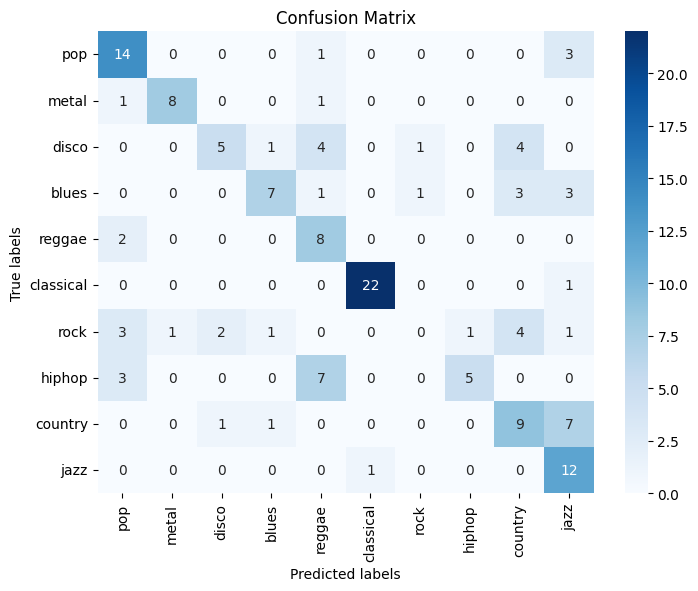

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Make predictions using the loaded model
predictions = model1.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=subfolders, yticklabels=subfolders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
## Loading the remaining models trained on the 30 second features with increased epochs

In [6]:
model2 = load_model('cnn_model2_30_features.h5')
model3 = load_model('cnn_model3_30_features.h5')
model4 = load_model('cnn_model4_30_features.h5')
model5 = load_model('cnn_model5_30_features_improved.h5')
model6 = load_model('cnn_model6_30_features.h5')
model7 = load_model('cnn_model7_30_features.h5')

In [38]:
model7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               30208     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 256)              

In [14]:
path2 = '../Data/features_30_sec.csv'
df = pd.read_csv(path2)
df.head(1)
df = df.drop('filename',axis=1)
df.head(1)
labels = df['label']
features = df.drop('label',axis=1)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize a scaler object
scaler = StandardScaler()

# Fit the scaler on the training features and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit and transform the label encoder on the training labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Perform the same label encoding on the testing labels
y_test_encoded = label_encoder.transform(y_test)

PermutationExplainer explainer: 201it [00:53,  3.06it/s]                         


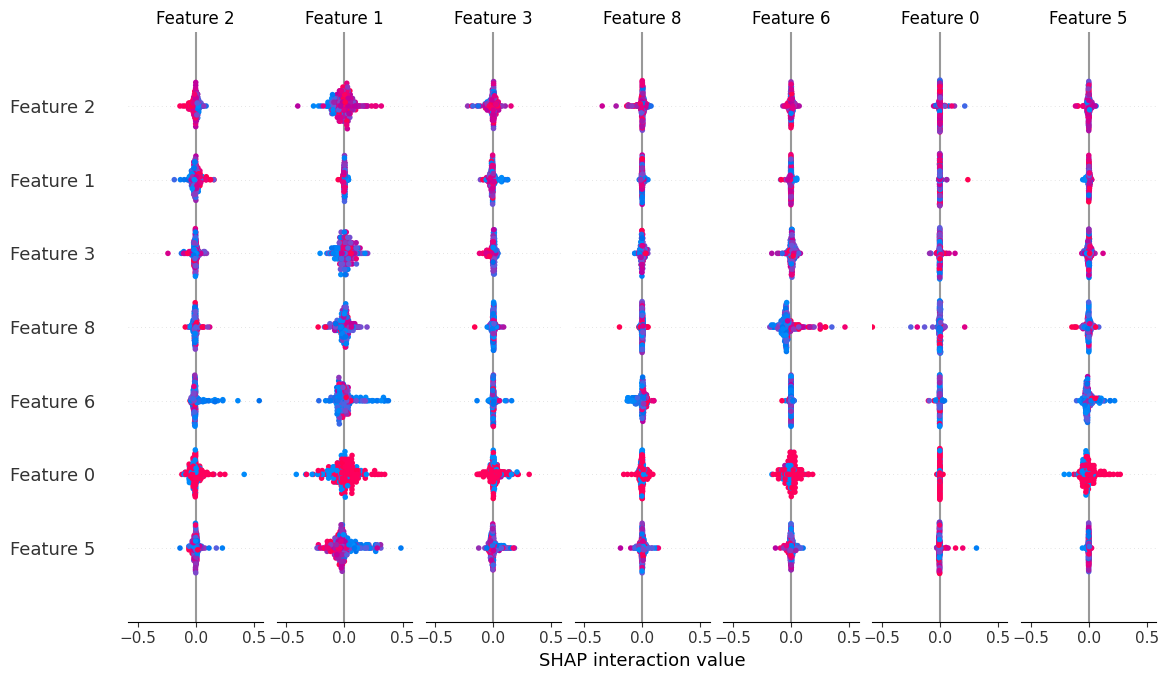

In [31]:
import shap
# Assuming 'model' is your trained model
explainer = shap.Explainer(model4, X_train_scaled)
shap_values = explainer(X_test_scaled)

# # Convert the numpy array to a pandas DataFrame
# X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=[f"feature_{i}" for i in range(X_test_scaled.shape[1])])

# Now use the DataFrame for SHAP summary plot
shap.summary_plot(shap_values.values, X_test_scaled, plot_type='bar')
# Assuming 'shap_values' contains the SHAP values from the summary plot
shap_summary_values = shap_values.values

# Get the mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_summary_values), axis=0)

# Filter features with positive contributions
positive_contributing_features = np.where(mean_abs_shap > 0)[0]

# Select only the columns with positive contributions from your dataset
X_train_positive_contributions = X_train_scaled[:, positive_contributing_features]
X_test_positive_contributions = X_test_scaled[:, positive_contributing_features]


In [32]:
y_pred = model5.predict(X_test_positive_contributions)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 4ms/step
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.93      1.00      0.96        13
           2       0.69      0.74      0.71        27
           3       0.74      0.67      0.70        21
           4       0.76      0.87      0.81        15
           5       0.95      0.91      0.93        22
           6       0.79      0.92      0.85        25
           7       0.83      0.77      0.80        13
           8       0.65      0.48      0.55        23
           9       0.55      0.52      0.54        21

    accuracy                           0.76       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.76      0.76      0.75       200



In [40]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model7.predict(X_test_scaled)  # Make predictions on the scaled test data
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_encoded, y_pred_labels)  # Calculate accuracy
report = classification_report(y_test_encoded, y_pred_labels)  # Generate a detailed classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

7/7 [==============================] - 0s 2ms/step
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       1.00      0.85      0.92        13
           2       0.83      0.74      0.78        27
           3       0.70      0.76      0.73        21
           4       0.67      0.80      0.73        15
           5       0.86      0.86      0.86        22
           6       0.82      0.92      0.87        25
           7       0.79      0.85      0.81        13
           8       0.85      0.48      0.61        23
           9       0.58      0.67      0.62        21

    accuracy                           0.77       200
   macro avg       0.78      0.78      0.77       200
weighted avg       0.78      0.77      0.77       200



7/7 [==============================] - 0s 3ms/step


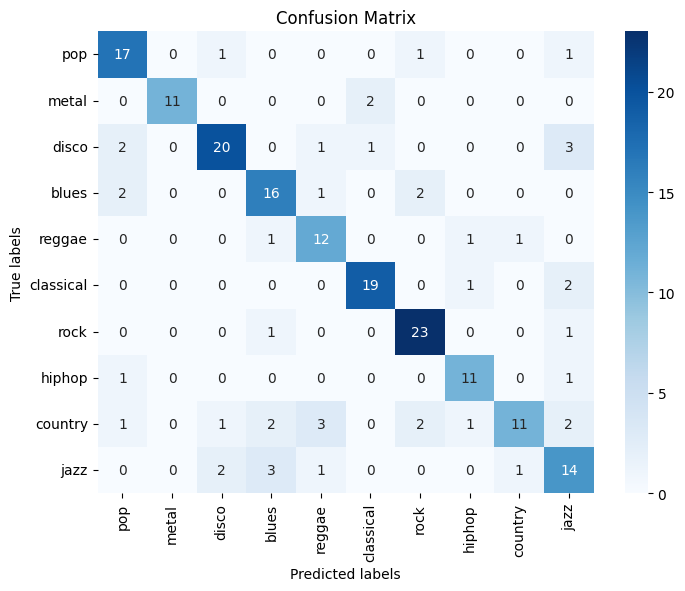

In [41]:
# Make predictions using the loaded model
predictions = model7.predict(X_test_scaled)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=subfolders, yticklabels=subfolders)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()